### Example of using feature scaling in scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For many learning algorithms it can be a major problem if the various features differ in terms of magnitude.

To exemplify, we make a synthetic toy dataset by generating normally distributed numbers in two dimensions. The first dimension has a much larger variance than the second dimension, which you can see in the scatterplot.

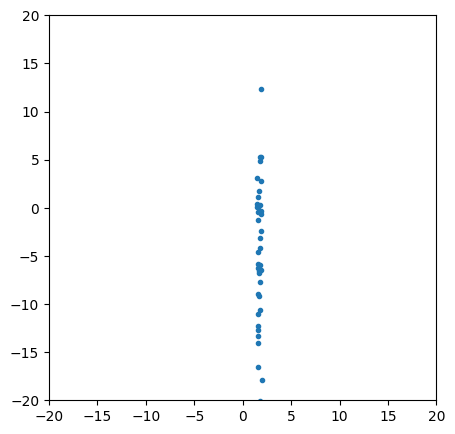

In [2]:
X = np.random.normal(size=(40, 2)) * [0.2, 10] + [1.7, -3.2]

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:, 1], marker='.')
plt.axis([-20, 20, -20, 20]);

The `StandardScaler` applies the transformation
$
f_{new} = \frac{f - \bar{f}}{\sigma_f}
$ to each dimension, where $\bar{f}$ is the mean and $\sigma_f$ the standard deviation for that dimension. This will result in each dimension having a mean of 0 and a standard deviation of 1.

Please note that when our data is stored in a *sparse* matrix, for instance when we have a `DictVectorizer` or a `CountVectorizer`, the `StandardScaler` will be created with the option `with_mean=False`. This means that we don't subtract $\bar{f}$. The reason is that we want to keep the matrix sparse: if an entry was zero before the transformation, we'd like it to be zero after the transformation also.

As usual, the call `fit_transform` consists of a call to `fit` and then to `transform`. In this case, `fit` will compute the mean and standard deviation, and then `transform` will apply the formula mentioned above.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xs = sc.fit_transform(X)

Below is a plot of the same data, after the `StandardScaler` has been applied.

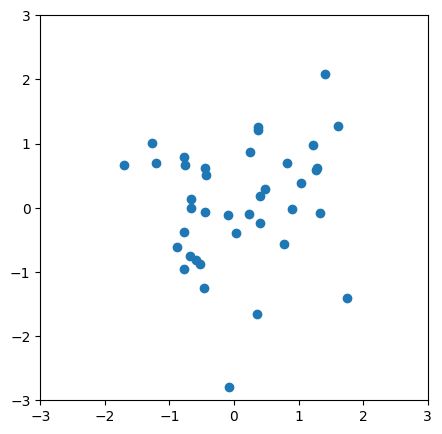

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(Xs[:,0], Xs[:, 1])
plt.axis([-3, 3, -3, 3]);

A `MinMaxScaler` instead apply the transformation $f_{new} = \frac{f - f_{min}}{f_{max} - f_{min}}$, where $f_{min}$ and $f_{max}$ are the minimal and maximal values of the feature that we have observed in our training data.

This will result in a transformed dataset where the new minimal value of each feature is 0, and the maximal value is 1.

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
Xs = sc.fit_transform(X)

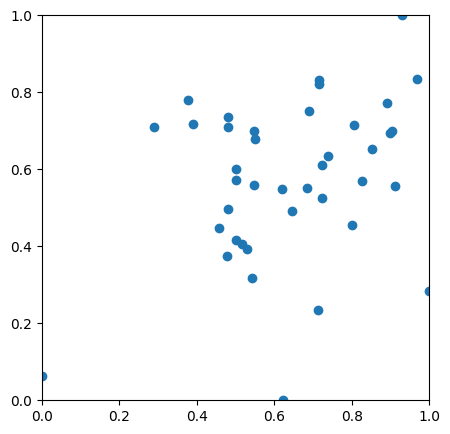

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(Xs[:,0], Xs[:, 1])
plt.axis([0, 1, 0, 1]);

The `MaxAbsScaler` applies a similar transformation.